# [BERTによる類似文書の検索](https://lab.m-field.co.jp/2020/11/30/search-by-bert/)

## TimeZone

In [1]:
!rm /etc/localtime
!ln -s /usr/share/zoneinfo/Japan /etc/localtime
!date

Fri Sep 10 12:28:37 JST 2021


## 変数設定

In [2]:
# clients = ["kosfja", "clb", "nu"]
clients = ["clb"]

In [3]:
from_date = "2021-01-01"

In [4]:
#to_date = "2021-03-31"
to_date = "2021-01-31"

In [5]:
project_id = 'bwing-230309'

## Provide your credentials to the runtime

In [6]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Optional: Enable data table display

In [7]:
%load_ext google.colab.data_table

In [8]:
from google.cloud import bigquery

def query(project_id, client_id, from_date, to_date):
  client = bigquery.Client(project=project_id)

  print((project_id, client_id, from_date, to_date))
  
  df = client.query(f'''
  SELECT
    client,
    quest_item_name AS text,
  FROM
    `bwing-230309.whatya.log_info`
  WHERE
    client = '{client_id}'
    AND quest_item_name != ''
    AND quest_item_name NOT IN ('init', 'init_bot', 'init_op', 'LINKAGE-Newest')
    AND REGEXP_EXTRACT(quest_item_name, '(テスト)') IS NULL
    AND date BETWEEN '{from_date}' AND '{to_date}'
  ORDER BY timestamp
  ''').to_dataframe()
  # print(df.head(10))
  return df

In [9]:
import os
import numpy as np

groups = clients

texts  = []
labels = []

for group in groups:
    client_id = group
    df = query(project_id, client_id, from_date, to_date)

    # for t in df['quest_item_name']:
    for t in df['text']:
        if t != []:
            texts.append(t) 
            labels.append(group)
labels = np.array(labels) 

('bwing-230309', 'clb', '2021-01-01', '2021-01-31')


In [10]:
#print(texts)
len(texts)

1687

In [11]:
import pandas as pd
df = pd.DataFrame(list(zip(labels, texts)), columns = ['client', 'text'])

In [12]:
# df.head()

## 下準備

In [13]:
%%bash
# データセットのダウンロード
# wget https://www.rondhuit.com/download/ldcc-20140209.tar.gz
# tar xvzf ldcc-20140209.tar.gz
# ライブラリのインストール
apt install aptitude swig
aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
#pip install mecab-python3==0.996.5
pip install mecab-python3
#pip install unidic-lite nlplot japanize-matplotlib transformers fugashi ipadic
pip install unidic-lite japanize-matplotlib transformers fugashi ipadic
#pip install nlplot==1.2.0

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
  swig3.0
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp-date-perl
  l

In [14]:
%%bash
pip install pandas numpy tqdm seaborn matplotlib wordcloud pillow networkx ipython scikit-learn
pip install plotly>=4.12.0 -U
pip install pyLDAvis==2.1.2
pip install nlplot==1.2.0

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=71bd4266e50ddff0f88d3a2e175b987b52530f02efd76dd21ce392b01ba72119
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [15]:
!pip install ginza ja-ginza
#!pip install ginza ja-ginza-electra

     |████████████████████████████████| 58.7 MB 8.1 kB/s 
     |████████████████████████████████| 5.8 MB 38.0 MB/s 
     |████████████████████████████████| 70 kB 8.0 MB/s 
     |████████████████████████████████| 456 kB 48.1 MB/s 
     |████████████████████████████████| 10.1 MB 37.5 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 623 kB 44.3 MB/s 
     |████████████████████████████████| 473 kB 46.5 MB/s 
  Created wheel for ginza: filename=ginza-5.0.2-py3-none-any.whl size=17857 sha256=dd571eab2760bbd415dbabd0fe0c1fc853ced88f4b8be2baf0ab409148c875c7
  Stored in directory: /root/.cache/pip/wheels/63/3d/ef/46ca55e86d264ddffc04422b20a53d1a0fbd781f1904e2c577
  Created wheel for SudachiDict-core: filename=SudachiDict_core-20210802-py3-none-any.whl size=71418512 sha256=2cb9c6b7d42e1782fdc8f483b9927ea1876561eedf3a0934feccd2bd5e156b9f
  Stored in directory: /root/.cache/pip/wheels/91/e8/21/e80d212743835d87bb5e7eca81b6abef6d8cb67a294007a837
 

In [16]:
#!pip install --upgrade plotly

In [17]:
#!pip install pyLDAvis==2.1.2

In [18]:
import pkg_resources, imp
imp.reload(pkg_resources)

<module 'pkg_resources' from '/usr/local/lib/python3.7/dist-packages/pkg_resources/__init__.py'>

## データセットの読み込み

In [19]:
import os
import re
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()
import nlplot
import warnings
warnings.simplefilter('ignore')    
import torch
import transformers
from transformers import BertJapaneseTokenizer
import logging
logging.getLogger("transformers.tokenization_utils_base").setLevel(logging.ERROR) # tokenize時の警告を抑制
# def load_dataset():
#     """データセットの読み込み"""
#     paths = []
#     for dirpath, dirnames, filenames in os.walk('./text'):
#         for file in filenames:
#             if re.match(r'.+[0-9].txt',  file):
#                 #print("{0}".format(file))
#                 paths.append(os.path.join(dirpath, file))                
#     data = {
#         'path': [],
#         'URL': [],
#         'date': [],
#         'title': [],
#         'text': [],
#     }
#     for path in paths:
#         with open(path, 'r') as f:
#             url = f.readline().strip('¥n')
#             date = f.readline().strip('¥n')
#             title = f.readline().strip('¥n')
#             text = f.read()
#             data['path'].append(path)
#             data['URL'].append(url)
#             data['date'].append(date)
#             data['title'].append(title)
#             data['text'].append(text)
#     return pd.DataFrame(data)
# df = load_dataset()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working



## 文書の特徴ベクトル化

In [20]:
#!pip install transformers==3.0.0

In [21]:
class BertExtractor:
    """文書特徴抽出用クラス"""
    def __init__(self):
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu' #GPUが使用可能ならGPUを使用
        self.model_name = 'cl-tohoku/bert-base-japanese-whole-word-masking' #使用する学習済みモデル名
        self.tokenizer = BertJapaneseTokenizer.from_pretrained(self.model_name) #使用するBERTトークナイザー
        self.bert_model = transformers.BertModel.from_pretrained(self.model_name) #学習済みモデル呼び出し
        self.bert_model = self.bert_model.to(self.device)
        self.max_len = 128 #使用する入力文書の長さ。最大512まで
    
    def extract(self, sentence):
        """文書特徴ベクトルを抽出する"""
        # 文書のトークナイズ
        inp = self.tokenizer.encode(sentence)
        len_inp = len(inp)
        # 入力トークン数の調整
        if len_inp >= self.max_len:
            inputs = inp[:self.max_len]
        else:
            inputs = inp + [0] * (self.max_len - len_inp)
        # モデルへ文書を入力し特徴ベクトルを取り出す
        inputs_tensor = torch.tensor([inputs], dtype=torch.long).to(self.device)        
        seq_out, _ = self.bert_model(inputs_tensor, return_dict=False)
        if torch.cuda.is_available():    
            return seq_out[0][0].cpu().detach().numpy() # 0番目は [CLS] token, 768 dim の文章特徴量
        else:
            return seq_out[0][0].detach().numpy()

In [22]:
def cos_sim_matrix(matrix):
    """文書間のコサイン類似度を計算し、類似度行列を返す"""
    d = matrix @ matrix.T
    norm = (matrix * matrix).sum(axis=1, keepdims=True) ** .5
    return d / norm / norm.T

In [23]:
bex = BertExtractor()
df['text_feature'] = df['text'].progress_apply(lambda x: bex.extract(x)) # 文書の特徴ベクトル化
sim = cos_sim_matrix(np.stack(df.text_feature)) # 類似度行列

Downloading:   0%|          | 0.00/258k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/479 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/1687 [00:00<?, ?it/s]

## 類似文書の検索

In [24]:
def search(n=100):
    # doc = df.sample(1)
    doc = df.head(1)
    doc_idx = doc.index[0]
    sim_index = sim[doc_idx].argsort()[::-1]
    rec_df = df.iloc[sim_index][:n]
    rec_df['similarity'] = np.sort(sim[doc_idx])[::-1][:n]
    #return rec_df[['title', 'text', 'similarity']]
    return rec_df[['client', 'text', 'similarity']]

# df2 = search()
# df2 = search(1000)
df2 = search(len(df))

In [25]:
len(df2)

1687

## 検索結果の可視化

In [26]:
#def tokenize(text,):
#    tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')
#    wakati_ids = tokenizer.encode(text, return_tensors='pt')
#    tokens = tokenizer.convert_ids_to_tokens(wakati_ids[0].tolist())
#    return tokens[1:-1] #[CLS], [SEP]トークンを除く
#
#df2['tokenized_text'] = df2['text'].progress_apply(tokenize)

In [27]:
import spacy
import re
nlp = spacy.load('ja_ginza')

def tokenize(text):
    #tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking')
    #wakati_ids = tokenizer.encode(text, return_tensors='pt')
    #tokens = tokenizer.convert_ids_to_tokens(wakati_ids[0].tolist())
    #return tokens[1:-1] #[CLS], [SEP]トークンを除く
    
    doc =nlp(text)
    tokens = []
    for token in doc:
        # print(np)
        tmp = re.sub(r'^[!-/:-@[-`{-~]$', '', token.lemma_)
        tmp = re.sub(r'^[！-／：-＠［-｀｛-～、-〜”’・ー]$', '', tmp)
        tmp = re.sub(r'^[あ-ん]{1,2}$', '', tmp)
        tmp = re.sub(r'^[\s]+$', '', tmp)
        if tmp:
            tokens.append(tmp)
    return tokens

df2['tokenized_text'] = df2['text'].progress_apply(tokenize)

  0%|          | 0/1687 [00:00<?, ?it/s]

In [28]:
df2.head()

,client,text,similarity,tokenized_text
0,clb,お客様相談室・FAQ,1.0,"[お客様相談室, FAQ]"
1456,clb,お客様相談室・FAQ,1.0,"[お客様相談室, FAQ]"
384,clb,お客様相談室・FAQ,1.0,"[お客様相談室, FAQ]"
381,clb,お客様相談室・FAQ,1.0,"[お客様相談室, FAQ]"
377,clb,お客様相談室・FAQ,1.0,"[お客様相談室, FAQ]"


In [29]:
df2.dropna(subset=['text', 'tokenized_text'], how="all", inplace=True)

In [30]:
#df2

In [31]:
npt = nlplot.NLPlot(df2, target_col='tokenized_text')

# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
#stopwords = npt.get_stopword(top_n=20, min_freq=0)

In [32]:
from spacy.lang.ja.stop_words import STOP_WORDS

In [33]:
import ginza
stopwords = list(STOP_WORDS)
# stopwords.extend(['・', '＿', '、', '。', '?', '？', '。', '、', '(', ')', '（', '）', '・', '「', '」', '『', '』', '：', '〜', '＝', '※', '”', '“', '→', '…', '×', '！', '／', '？', '○', 'ノ', '〈', '〉', '々', '，', '＆', '☆', '―', '＋', 'α', '〒', '《', '》', '‐', '…。', '【', '】', '★', '；', '’', 'β', '（-', '−', '〔', 'μ', '〕', 'ˈ', '＞', '（）', '＜', '́', '――', '．', 'ə', 'ｍ', '［', '］', 'γ', '〇', '■', '●', 'ː', '（=', '＊', '（株）', '△', 'ε', '▲', 'π', 'φ', 'δ', '‘', '−1', 'σ', 'Δ', 'θ', 'λ', '◎', 'ω', '。(', 'Σ', '─', 'ν', 'ɛ', 'ɪ', '（+', 'Ω', 'ノルマン人', 'ρ', '□', '←', 'ゝ', '。}}', 'τ', 'Ａ', '（笑）', '×3', 'κ', 'ɔ', 'η', '＠', '（～', '′', 'ʃ', 'ノルマン', 'Ἀ', '（.', 'ο', '「(', '÷', '「～', 'ʊ', '◆', '（?', '（≒', '（（', 'ζ', '（財）', '↑', 'ι', 'Γ', 'χ', 'محمد', '〇〇', '。!', 'Λ', 'ˌ', 'ʿ', '。-', 'Ｂ', '「-', '（－', '｝', 'Ζ', '◇', 'بن', '£', 'ψ', '（(', 'Φ', '｛', '（’', 'υ', 'ʒ', 'Α', '（社）', '。}}}}', 'ノリス', 'ɾ', 'عبد', 'Ｔ', '。)', 'ɡ', 'əˈ', 'ゞ', 'ｔ', 'ノウサギ', '−2', 'ɣ', 'Π', 'ɒ', '↓', 'ʻ', '︎', '｜', 'Ｃ', 'Ε', '『’', 'Ｆ', 'ξ', 'ɑ', 'Ｍ', 'ノモス', '〆', 'Ｄ', '（”', 'Ζガンダム', 'ʌ', 'Ｈ', 'Ｖ', '￥', 'Ｘ', 'Ｊ', 'ɐ', 'ʁ', 'ɔː', '（有）', '−3', 'Ｅ', '（—', 'ɨ', '（｢', 'Ｓ', 'ʲ', '○×', 'الله', 'ｃｍ', 'ノリッチ'])
# stopwords = []

In [34]:
stopwords

['し',
 'あ',
 'と',
 'にて',
 'ば',
 'ぶり',
 'これ',
 'そこ',
 'かつ',
 'なる',
 '一',
 'できる',
 'だけ',
 'その',
 'のち',
 'うち',
 'しよう',
 'および',
 'この',
 'しまう',
 'いっ',
 'が',
 'こ',
 'ね',
 'さん',
 'おり',
 'こう',
 'られる',
 'ち',
 'よく',
 'ところ',
 'すぐ',
 'ひと',
 'つつ',
 'に',
 'も',
 'です',
 'か',
 'から',
 'かけ',
 'ら',
 'よれ',
 'でき',
 'さらに',
 'なっ',
 'だっ',
 'ある',
 'の',
 'どう',
 'は',
 'なかっ',
 'ん',
 'かつて',
 'くん',
 'すべて',
 'お',
 'こと',
 'いずれ',
 'たち',
 'する',
 'よ',
 'もと',
 'ほか',
 'なく',
 'ほとんど',
 'また',
 'など',
 'す',
 'い',
 'のみ',
 'れ',
 'しまっ',
 'え',
 'あるいは',
 'そう',
 'み',
 'もの',
 'まで',
 'とも',
 'いく',
 'あり',
 'つ',
 'な',
 'やっ',
 'た',
 'あまり',
 'いわ',
 'しか',
 'ほぼ',
 'なし',
 'ごと',
 'いる',
 'かなり',
 'おい',
 'たら',
 'なら',
 'おけ',
 'ほど',
 'せい',
 'きっかけ',
 'べき',
 'もっ',
 'しかし',
 'たい',
 'なお',
 'ただし',
 'そして',
 'まま',
 'で',
 'さ',
 'よっ',
 'ない',
 'ま',
 'や',
 'ながら',
 'あっ',
 'より',
 'き',
 'はじめ',
 'せ',
 'あれ',
 'それ',
 'それぞれ',
 'とっ',
 'ちゃん',
 'を',
 'る',
 'られ',
 'いい',
 'よる',
 'ため',
 'ます',
 'つい',
 'いつ',
 'よう',
 'れる',
 'だ',
 'つけ',
 'ここ',
 'ご',
 'なり',
 'ぬ',
 'とき',
 'て',
 '

In [35]:
# bi-gram表示
npt.bar_ngram(
    title='bi-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=2,
    top_n=50,
    stopwords=stopwords,
    # save=True
)

100%|██████████| 1687/1687 [00:00<00:00, 68882.24it/s]


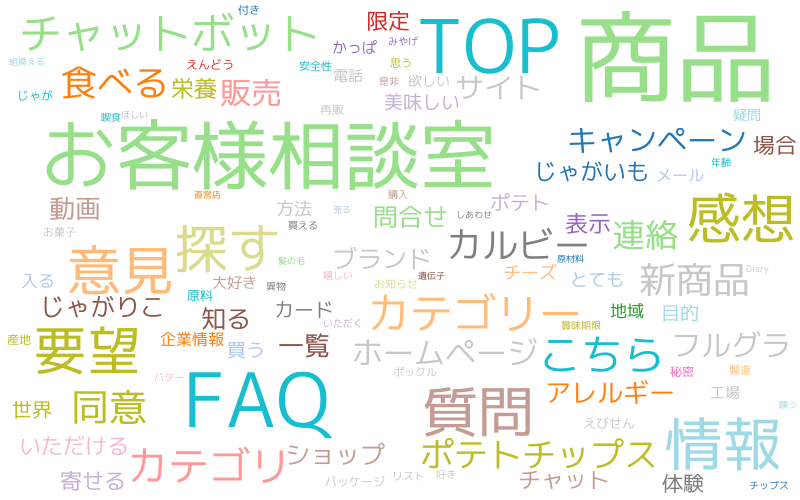

In [36]:
npt.wordcloud(
    max_words=100,
    max_font_size=100,
    colormap='tab20_r',
    stopwords=stopwords,
    # save=True
)

# [自然言語を簡単に可視化・分析できるライブラリ「nlplot」を公開しました](https://www.takapy.work/entry/2020/05/17/192947)

## N-gram bar chart

In [37]:
# 1. N-gram bar chart
npt.bar_ngram(title='uni-gram', ngram=1, top_n=50, stopwords=stopwords, save=True)

100%|██████████| 1687/1687 [00:00<00:00, 51041.94it/s]


In [38]:
npt.bar_ngram(title='bi-gram', ngram=2, top_n=50, stopwords=stopwords, save=True)

100%|██████████| 1687/1687 [00:00<00:00, 99281.48it/s]


## N-gram tree Map

In [39]:
# 2. N-gram tree Map
npt.treemap(title='Tree of Most Common Words', ngram=1, top_n=30, stopwords=stopwords, save=True)

100%|██████████| 1687/1687 [00:00<00:00, 82602.24it/s]


## Histogram of the word count

In [40]:
# 3. Histogram of the word count
npt.word_distribution(title='words distribution', save=True)

## wordcloud

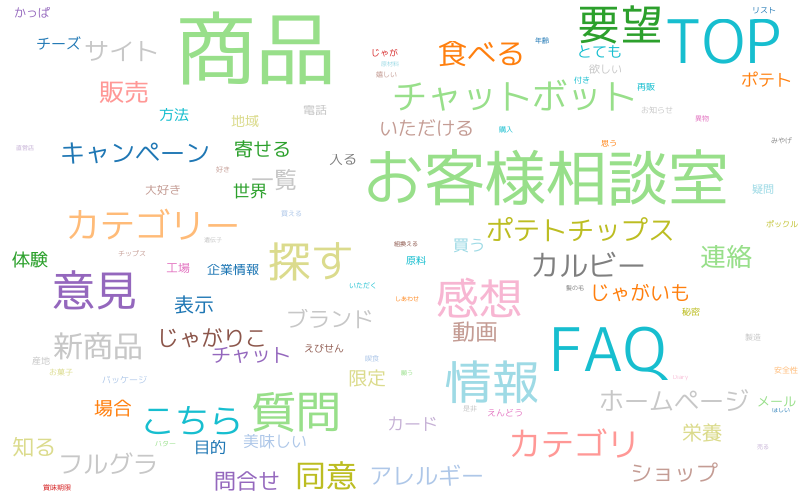

In [41]:
# 4. wordcloud
npt.wordcloud(stopwords=stopwords, colormap='tab20_r', save=True)

## co-occurrence networks

In [42]:
# 5. co-occurrence networks
npt.build_graph(stopwords=stopwords, min_edge_frequency=10)

# The number of nodes and edges to which this output is plotted.
# If this number is too large, plotting will take a long time, so adjust the [min_edge_frequency] well.
# >> node_size:70, edge_size:166
npt.co_network(title='Co-occurrence network', save=True)

node_size:36, edge_size:57


## sunburst chart

In [43]:
# 6. sunburst chart
npt.sunburst(title='sunburst chart', colorscale=True, save=True)

## pyLDAvis

In [44]:
# 7. pyLDAvis
# If you want to run it in a notebook environment, you need to use the import and magic commands
import pyLDAvis
pyLDAvis.enable_notebook()
npt.ldavis(num_topics=5, passes=5, save=True)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.211216 -0.128772       1        1  22.594658
4     -0.204355 -0.103369       2        1  22.137893
0     -0.161771 -0.024970       3        1  19.683901
1      0.133762 -0.030213       4        1  18.917803
3      0.021149  0.287323       5        1  16.665746, topic_info=       Term        Freq       Total Category  logprob  loglift
3        商品  325.000000  325.000000  Default  30.0000  30.0000
0       FAQ  170.000000  170.000000  Default  29.0000  29.0000
82      TOP  161.000000  161.000000  Default  28.0000  28.0000
1    お客様相談室  177.000000  177.000000  Default  27.0000  27.0000
220      要望   85.000000   85.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
384      野球    1.947575    3.551615   Topic5  -5.8951   1.1910
225      良い    1.942144    3.459578   Topic5  -5.8979   1.2145
381      プロ    1.944533    3.551767   Topic5  -5.8967   1.1894
453      出る    1.965133    5.134317   Topic5  -5.8861   0.8314
24     フルグラ    1.993748   24.825839   Topic5  -5.8717  -0.7301

[245 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
159       1  0.383334     1
159       2  0.095833     1
159       3  0.479167     1
246       3  0.730907    11
246       5  0.182727    11
...     ...       ...   ...
8         4  0.149672   食べる
8         5  0.024945   食べる
97        1  0.734542    食育
323       3  0.825654  香ばしい
257       1  0.818753   髪の毛

[306 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 1, 2, 4])

In [45]:
!ls -l *.html

-rw-r--r-- 1 root root 3609569 Sep 10 12:34  2021-09-10_bi-gram.html
-rw-r--r-- 1 root root 3623783 Sep 10 12:34 '2021-09-10_Co-occurrence network.html'
-rw-r--r-- 1 root root   38389 Sep 10 12:34  2021-09-10_pyldavis.html
-rw-r--r-- 1 root root 3610191 Sep 10 12:34 '2021-09-10_sunburst chart.html'
-rw-r--r-- 1 root root 3608648 Sep 10 12:34 '2021-09-10_Tree of Most Common Words.html'
-rw-r--r-- 1 root root 3608792 Sep 10 12:34  2021-09-10_uni-gram.html
-rw-r--r-- 1 root root 3610727 Sep 10 12:34 '2021-09-10_words distribution.html'


In [46]:
%%bash
TODAY=$(date '+%Y-%m-%d')
zip ${TODAY}.zip *.html

  adding: 2021-09-10_bi-gram.html (deflated 70%)
  adding: 2021-09-10_Co-occurrence network.html (deflated 70%)
  adding: 2021-09-10_pyldavis.html (deflated 65%)
  adding: 2021-09-10_sunburst chart.html (deflated 70%)
  adding: 2021-09-10_Tree of Most Common Words.html (deflated 70%)
  adding: 2021-09-10_uni-gram.html (deflated 70%)
  adding: 2021-09-10_words distribution.html (deflated 70%)


In [47]:
import datetime
from google.colab import files

dt_now = datetime.datetime.now()
today = dt_now.strftime('%Y-%m-%d')

files.download(f"{today}.zip".format(today))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>